In [30]:
%matplotlib inline

In [31]:

import datetime as dt

import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

# Largest Context:
#sns.set_context("talk")

from metpy.calc import dewpoint_from_relative_humidity
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo
from metpy.units import units

import os

# Height of the station to calculate MSLP
hgt_example = 206.

def calc_mslp(t, p, h):
    return p * (1 - (0.0065 * h) / (t + 0.0065 * h + 273.15)) ** (-5.257)


testdata = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_1min - Copy.dat',header=1).drop([0,1])
testdata2 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_1min.dat',header=1).drop([0,1])
testdata3 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_2022_1min.dat',header=1).drop([0,1])

testdata_all = pd.concat([testdata,testdata2,testdata3]).replace('NAN',np.nan)

testdata_all['Time_Eastern'] = pd.to_datetime(testdata_all['TIMESTAMP'])+pd.Timedelta(value=1, unit='hours')
# testdata_all=testdata_all.set_index('Time_Eastern')

timestamps_est = np.array(testdata_all.Time_Eastern, dtype=dt.datetime)
temp_times = np.zeros(len(timestamps_est),dtype=dt.datetime)
for i in range(len(timestamps_est)):
    temp_times[i] = timestamps_est[i]+pd.Timedelta(value=5, unit='hours')

testdata_all['UTC'] = temp_times
testdata_all=testdata_all.set_index('UTC')

/tmp/ipykernel_73981/139545000.py:28: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata2 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_1min.dat',header=1).drop([0,1])
/tmp/ipykernel_73981/139545000.py:29: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata3 = pd.read_csv('/data/accp/a/snesbitt/scamp-2023/LoggerNet/SCAMPCR6_SCAMP_2022_1min.dat',header=1).drop([0,1])


In [32]:
yyyymmdd = '20221130'
if yyyymmdd == '20221130':
    dates = pd.date_range(start='2022-11-30',end='2022-11-30')
    xlimindexstart = dt.datetime.strptime('2022-11-30 10:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-11-30 23:00:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20230209':
    dates = pd.date_range(start='2023-02-09',end='2023-02-09')
    xlimindexstart = dt.datetime.strptime('2023-02-09 10:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2023-02-09 19:00:00','%Y-%m-%d %H:%M:%S') #19:07
elif yyyymmdd == '20211206':
    dates = pd.date_range(start='2021-12-06',end='2021-12-06')
    xlimindexstart = dt.datetime.strptime('2021-12-06 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2021-12-07 00:00:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20220222':
    dates = pd.date_range(start='2022-02-22',end='2022-02-22')
    xlimindexstart = dt.datetime.strptime('2022-02-22 12:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-02-23 00:00:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20220117':
    dates = pd.date_range(start='2022-01-17',end='2022-01-17')
    xlimindexstart = dt.datetime.strptime('2022-01-17 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-01-18 00:00:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20221118':
    dates = pd.date_range(start='2022-11-18',end='2022-11-20')
    xlimindexstart = dt.datetime.strptime('2022-11-18 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-11-21 00:00:00','%Y-%m-%d %H:%M:%S')
elif yyyymmdd == '20221223':
    dates = pd.date_range(start='2022-12-26',end='2022-12-26')
    xlimindexstart = dt.datetime.strptime('2022-12-26 00:00:00','%Y-%m-%d %H:%M:%S')
    xlimindexend = dt.datetime.strptime('2022-12-27 00:00:00','%Y-%m-%d %H:%M:%S')

2022-11-30 00:00:00 2022-12-01 00:00:00 1441


/data/keeling/a/mp46/miniconda3/envs/DataReader/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


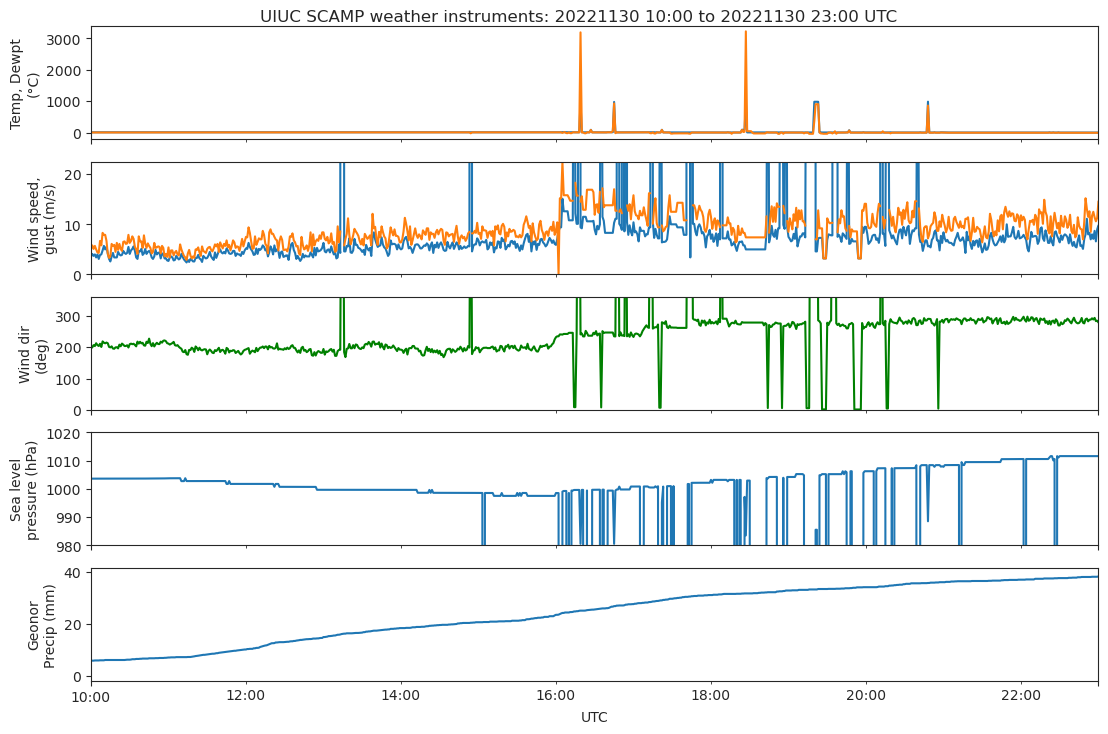

In [33]:

for idate in dates:
  
    t1=idate
    t2=idate+pd.Timedelta(1, unit='D')
    mask = (testdata_all.index >= t1) & (testdata_all.index <= t2)
    print(t1, t2, mask.sum())

    if mask.sum() > 0:

        testdata = testdata_all.loc[mask]

        # Temporary variables for ease
        temp = pd.to_numeric(testdata['Air_Temp_Avg'],errors='coerce')
        pressure = pd.to_numeric(testdata['Abs_Pressure_Avg'],errors='coerce')
        rh = pd.to_numeric(testdata['Rel_Hum_Avg'],errors='coerce')
        ws = pd.to_numeric(testdata['Wspd_Avg'],errors='coerce')
        ws[ws>50] == np.nan
        wsmax = pd.to_numeric(testdata['Wspd_Max'],errors='coerce')
        wsmax[wsmax > 50] = np.nan
        wd = pd.to_numeric(testdata['Wdir_Vct'],errors='coerce')
        precip = pd.to_numeric(testdata['Current_Depth'],errors='coerce')
        precip_rate = np.diff(pd.to_numeric(testdata['Current_Depth'],errors='coerce'))
        precip_rate[precip_rate < 0.05] = 0.
        precip_rate = np.concatenate([[0],precip_rate],axis=0)
        precip_daily = np.cumsum(precip_rate)
        freq = pd.to_numeric(testdata['Geonor_Freq'],errors='coerce')
        date = pd.to_datetime(testdata.index) #+ dt.timedelta(hours=1)


        data = pd.DataFrame({'Wind speed (m/s)': (np.array(ws) * units('m/s')),
                'Wind gust (1 sec, m/s)': (np.array(wsmax) * units('m/s')),
                'Wind direction (deg)': np.array(wd) * units('degrees'),
                'Dewpoint (F)': dewpoint_from_relative_humidity((np.array(temp) * units.degC),
                                                            np.array(rh) / 100.),
                'Pressure (hPa)': np.array(pressure) * units('hPa'),
                'Temperature (F)': (np.array(temp) * units('degC')),
                'Sea level pressure (hPa)': calc_mslp(np.array(temp), np.array(pressure), hgt_example) * units('hPa'),
                'Relative humidity': np.array(rh),
                'Precipitation rate (mm/hr)': np.array(precip_rate*60)* units('mm'),
                'Precip accumulation (mm)': np.array(precip_daily)* units('mm'), 'times': np.array(date),
                'Frequency': np.array(freq)})
        data.index=date

        fig = plt.figure(figsize=(13,8.5))

        ax=fig.subplots(nrows=5,ncols=1,sharex=True)

        data['Temperature (F)'].plot(ax=ax[0])
        data['Dewpoint (F)'].plot(ax=ax[0])
        ax[0].set_ylabel('Temp, Dewpt\n(°C)')

        data['Wind speed (m/s)'].plot(ax=ax[1])
        data['Wind gust (1 sec, m/s)'].plot(ax=ax[1])
        if np.isfinite(np.max(data['Wind gust (1 sec, m/s)'])):
            ax[1].set_ylim([0,np.max(data['Wind gust (1 sec, m/s)'])])
        else:
            ax[1].set_ylim([0,np.max(data['Wind speed (m/s)'])])
        ax[1].set_ylabel('Wind speed,\ngust (m/s)')

        data['Wind direction (deg)'].plot(ax=ax[2],color='g')
        ax[2].set_ylim([0,360])
        ax[2].set_ylabel('Wind dir\n(deg)')

        data['Sea level pressure (hPa)'].plot(ax=ax[3])
        ax[3].set_ylabel('Sea level\npressure (hPa)')
        ax[3].set_ylim([980,1020])

        data['Precip accumulation (mm)'].plot(ax=ax[4])
        ax[4].set_ylabel('Geonor\nPrecip (mm)')
        ax[4].set_xlim([xlimindexstart, xlimindexend])
        #data['Precipitation rate (mm/hr)'].plot(ax=ax, secondary_y=True)

        fig.suptitle('UIUC SCAMP weather instruments: '+xlimindexstart.strftime('%Y%m%d %H:%M')+' to '+xlimindexend.strftime('%Y%m%d %H:%M')+' UTC', y=0.90)

        plt.savefig('/data/keeling/a/mp46/Research/Saved_Images/Gauge_Parsivel_Rain_Cases/WXStation_BUF_'+t1.strftime('%Y%m%d')+'.png')
        #plt.close()

Text(0.5, 0.9, 'UIUC SCAMP weather instruments: 20221130 00:00 to 20221201 00:00')

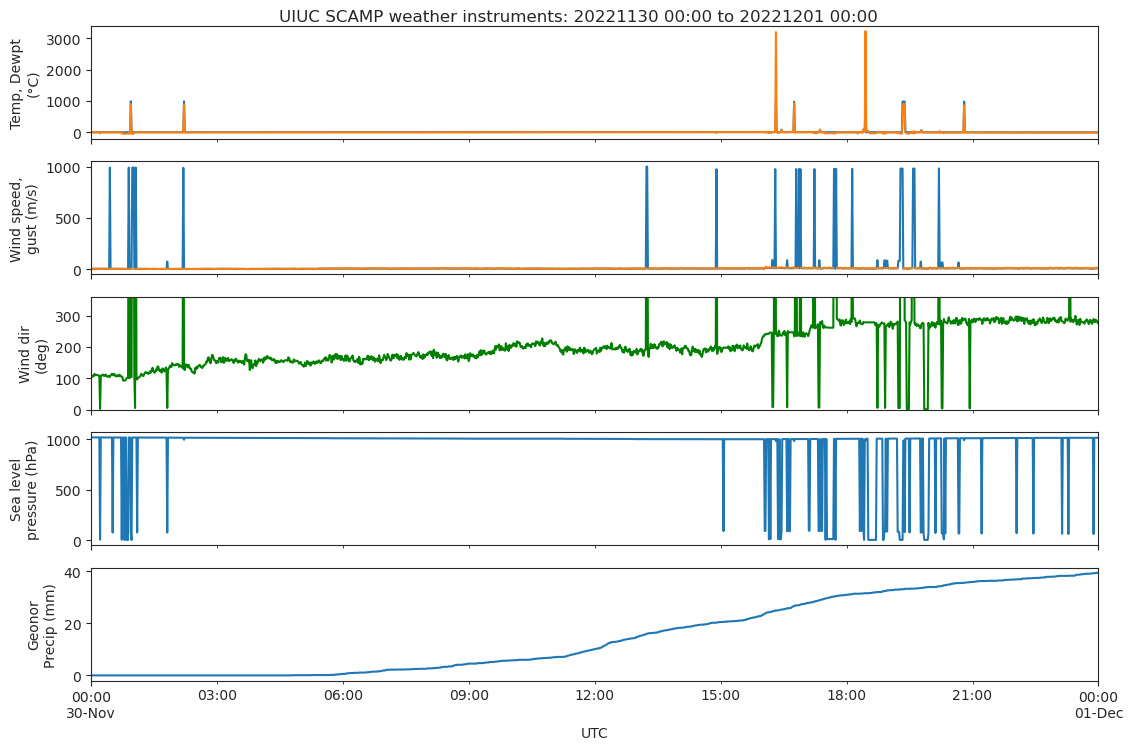

In [34]:
fig = plt.figure(figsize=(13,8.5))

ax=fig.subplots(nrows=5,ncols=1,sharex=True)

data['Temperature (F)'].plot(ax=ax[0])
data['Dewpoint (F)'].plot(ax=ax[0])
ax[0].set_ylabel('Temp, Dewpt\n(°C)')

data['Wind speed (m/s)'].plot(ax=ax[1])
data['Wind gust (1 sec, m/s)'].plot(ax=ax[1])
#ax[1].set_ylim([0,np.max(data['Wind gust (1 sec, m/s)'])])
ax[1].set_ylabel('Wind speed,\ngust (m/s)')

data['Wind direction (deg)'].plot(ax=ax[2],color='g')
ax[2].set_ylim([0,360])
ax[2].set_ylabel('Wind dir\n(deg)')

data['Sea level pressure (hPa)'].plot(ax=ax[3])
ax[3].set_ylabel('Sea level\npressure (hPa)')

data['Precip accumulation (mm)'].plot(ax=ax[4])
ax[4].set_ylabel('Geonor\nPrecip (mm)')
#data['Precipitation rate (mm/hr)'].plot(ax=ax, secondary_y=True)

fig.suptitle('UIUC SCAMP weather instruments: '+t1.strftime('%Y%m%d %H:%M')+' to '+t2.strftime('%Y%m%d %H:%M'), y=0.90)